In [1]:
import matplotlib.pyplot as plt
import sys
import os
# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader
import importlib
importlib.reload(dataloader)
import numpy as np
import mne
%matplotlib widget 
plot_flag = False

In [2]:
import warnings
warnings.filterwarnings('ignore', module='pandas')

In [ ]:
def plot_signal_with_events(time, data, channels, marker_channel, event_to_marker, seleted_time):
    """
    Plot signal data with background colors indicating different events.
    
    This function creates a time-series plot with colored background regions corresponding
    to different events. Each event type is assigned a unique color and plotted as a 
    semi-transparent background. Multiple signal channels can be overlaid on the same plot.
    
    Parameters
    ----------
    time : array-like
        Time vector in seconds, matching the length of data columns
    data : numpy.ndarray
        Signal data array with shape (n_channels, n_samples)
    channels : list of str
        List of channel names corresponding to rows in data
    marker_channel : array-like
        Array of marker values indicating which event is active at each time point.
        0 indicates no event, other values map to events via event_to_marker dict.
        Should have same length as time vector.
    event_to_marker : dict
        Dictionary mapping event names (str) to marker values (int).
        Example: {'Peppa': 1, 'Incredibles': 2, 'Brave': 3}
    seleted_time : list of float
        [start_time, end_time] in seconds, used for plot title
    
    Returns
    -------
    None
        Displays the plot using matplotlib
    
    Notes
    -----
    - Event regions are plotted as semi-transparent (alpha=0.3) background spans
    - Up to 6 default colors are cycled for different events
    - Each event is only added to the legend once, even if it appears multiple times
    - Grid is enabled with alpha=0.3 for better readability
    
    Examples
    --------
    >>> time, channels, data = multimodal_data.get_signals(
    ...     mode='EEG', member='ch', 
    ...     selected_channels=['Fz', 'Cz'], 
    ...     selected_times=[60, 120]
    ... )
    >>> time, marker_channel, event_to_marker = multimodal_data.get_events_as_marker_channel(
    ...     selected_times=[60, 120]
    ... )
    >>> plot_signal_with_events(time, data, channels, marker_channel, 
    ...                          event_to_marker, [60, 120])
    """
    # Create reverse mapping from marker value to event name
    marker_to_event = {v: k for k, v in event_to_marker.items()}

    # Create color map for events
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink', 'lavender']
    event_colors = {}
    for i, event_name in enumerate(marker_to_event.values()):
        if event_name != '':
            event_colors[event_name] = colors[i % len(colors)]

    plt.figure(figsize=(12, 5))

    # Plot background colors for each event
    current_marker = marker_channel[0]
    segment_start = time[0]

    for i in range(1, len(marker_channel)):
        if marker_channel[i] != current_marker:
            # End of current segment
            if current_marker > 0 and current_marker in marker_to_event:
                event_name = marker_to_event[current_marker]
                if event_name in event_colors:
                    plt.axvspan(segment_start, time[i-1], 
                            alpha=0.3, color=event_colors[event_name], 
                            label=event_name if segment_start == time[0] or event_name not in plt.gca().get_legend_handles_labels()[1] else '')
            # Start new segment
            current_marker = marker_channel[i]
            segment_start = time[i]

    # Handle last segment
    if current_marker > 0 and current_marker in marker_to_event:
        event_name = marker_to_event[current_marker]
        if event_name in event_colors:
            plt.axvspan(segment_start, time[-1], 
                    alpha=0.3, color=event_colors[event_name],
                    label=event_name if event_name not in plt.gca().get_legend_handles_labels()[1] else '')

    # Plot  data
    for idxch, ch in enumerate(channels):
            plt.plot(time, data[idxch, :], label=ch, linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'EEG Signal ({", ".join(channels)}) and Event Markers between {seleted_time[0]}s and {seleted_time[1]}s')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Load example data for one dyad

In [ ]:
dyad_id = "W030"
lowcut=1.0
highcut=40.0
eeg_filter_type = 'iir' # choose 'fir' or 'iir' for EEG filtering
q=8  # decimation factor
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", 
                                                    dyad_id = dyad_id, 
                                                    load_eeg=True, 
                                                    load_et=True, 
                                                    lowcut=lowcut, 
                                                    highcut=highcut, 
                                                    eeg_filter_type=eeg_filter_type, 
                                                    interpolate_et_during_blinks_threshold=0.3,
                                                    median_filter_size=64,
                                                    low_pass_et_order=351,
                                                    et_pos_cutoff=128,
                                                    et_pupil_cutoff=4,
                                                    pupil_model_confidence=0.9,
                                                    decimate_factor=q,
                                                    plot_flag=plot_flag)

Detected events: [{'name': 'Brave', 'start': 387.806640625, 'duration': 59.3310546875}, {'name': 'Peppa', 'start': 248.5107421875, 'duration': 59.6328125}, {'name': 'Incredibles', 'start': 318.3603515625, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 594.4892578125, 'duration': 181.0556640625}, {'name': 'Talk_2', 'start': 836.7275390625, 'duration': 181.056640625}]
Applying iir filters to EEG data.


/Users/admin/Library/CloudStorage/GoogleDrive-j.zygierewicz@uw.edu.pl/Mój dysk/SYNCIN_JZ/HYPERSCANNING_SIGNAL_ANALYSIS/hyperscanning-signal-analysis/.venv/lib/python3.12/site-packages/neurokit2/epochs/epochs_create.py:180: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  buffer.select_dtypes(exclude=["int", "int64"]).replace({0.0: np.n

Reseting the EEG time to the start of Peppa
ET time range: 241.59s to 461.89s
Events from ET annotations:
[None 'Peppa' 'Incredibles' 'Brave']
Reseting the ET time to the start of Peppa
Processing member: ch, blink column: ET_ch_blinks
Processing member: cg, blink column: ET_cg_blinks
Column ET_ch_blinks contains NaN values, applying forward fill before decimation.
Column ET_cg_blinks contains NaN values, applying forward fill before decimation.
Event Peppa start times are consistent within 0.0 seconds.
Event Incredibles differ in start times by: abs(0.0078125) seconds.
Event Brave differ in start times by: abs(0.0390625) seconds.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Peppa                          0.00            59.62          
Incredibles                    69.86           59.20          
Brave                          139.30          59.32       

## Select data according to an event

Retrieved EEG data shape: (3, 7633)


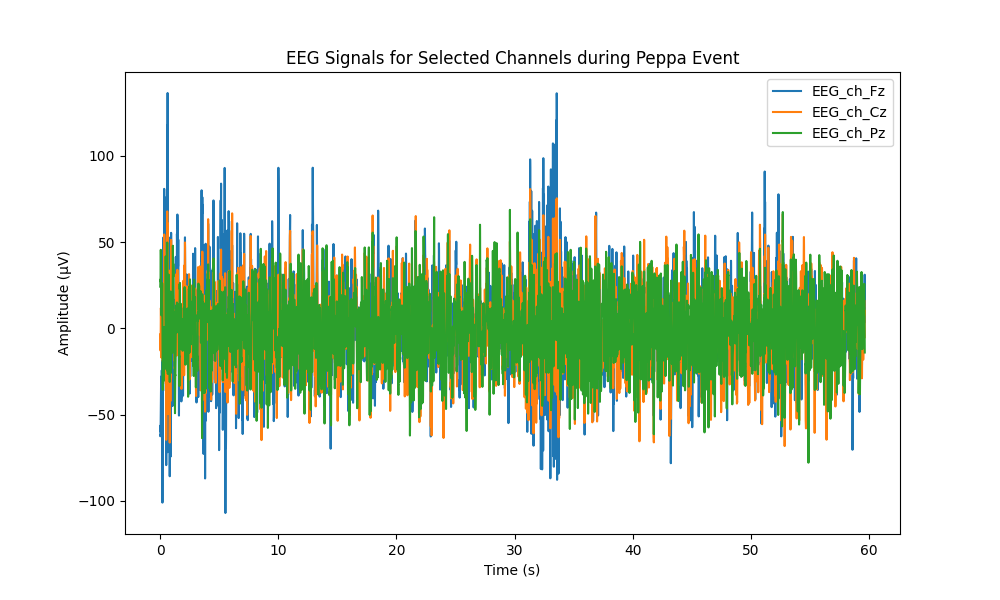

In [4]:
# Get selected child EEG channels for specific event

selected_event = 'Peppa' # 'Incredibles', 'Brave'
time, channels, data = multimodal_data.get_signals(
                mode='EEG', 
                member='ch', 
                selected_channels=['Fz', 'Cz', 'Pz'],
                selected_events=[selected_event]
            )
print(f"Retrieved EEG data shape: {data.shape}")  # Should be (n_channels, n_samples)
# Plot the retrieved EEG data
plt.figure(figsize=(10, 6))
for i, ch_name in enumerate(channels):
    plt.plot(time, data[i, :], label=ch_name)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signals for Selected Channels during {selected_event} Event')
plt.legend()
plt.show()

## Select data according to time
To visualise events we plot diode time-course

Retrieved EEG data shape: (3, 7680)


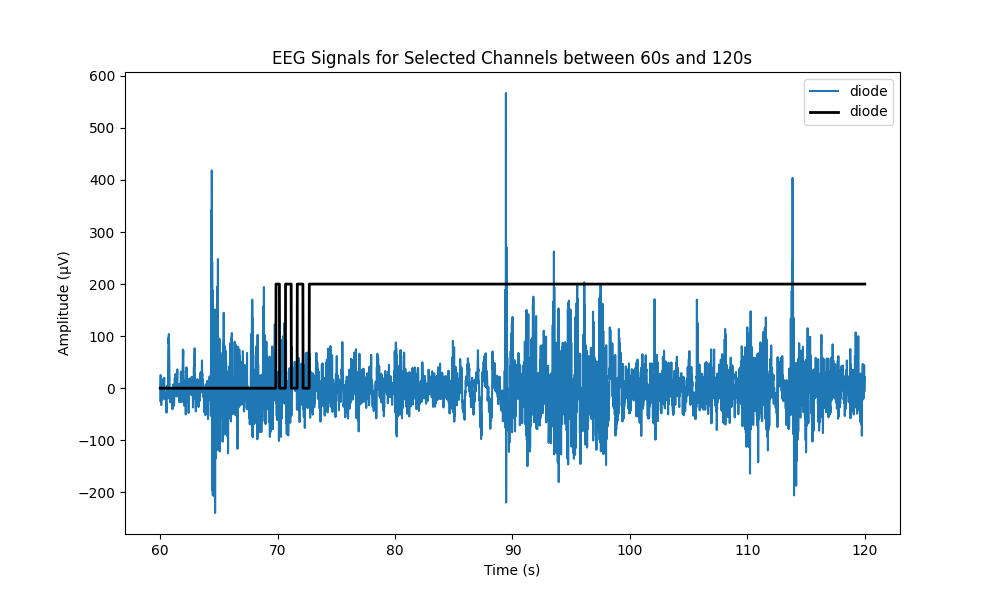

In [5]:
seleted_time = [60, 120]
# Get selected child EEG channels for specific time window
time, channels, data = multimodal_data.get_signals(
                mode='EEG', 
                member='ch', 
                selected_channels=['Fz', 'Cz', 'Pz'],
                selected_times=seleted_time
            )
time, channels, diode_data = multimodal_data.get_signals(
                mode='diode', 
                selected_channels=['diode'],
                selected_times=seleted_time
            )   
        
print(f"Retrieved EEG data shape: {data.shape}")  # Should be (n_channels, n_samples)
# Plot the retrieved EEG data
plt.figure(figsize=(10, 6))
for i, ch_name in enumerate(channels):
    plt.plot(time, data[i, :], label=ch_name)
plt.plot(time, diode_data[0, :]*200, label='diode', color='k', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signals for Selected Channels between {seleted_time[0]}s and {seleted_time[1]}s')
plt.legend()
plt.show()

## Select data using both time and event
- in this case we return the intersection of the time range and event range

Retrieved EEG data shape: (3, 6419)


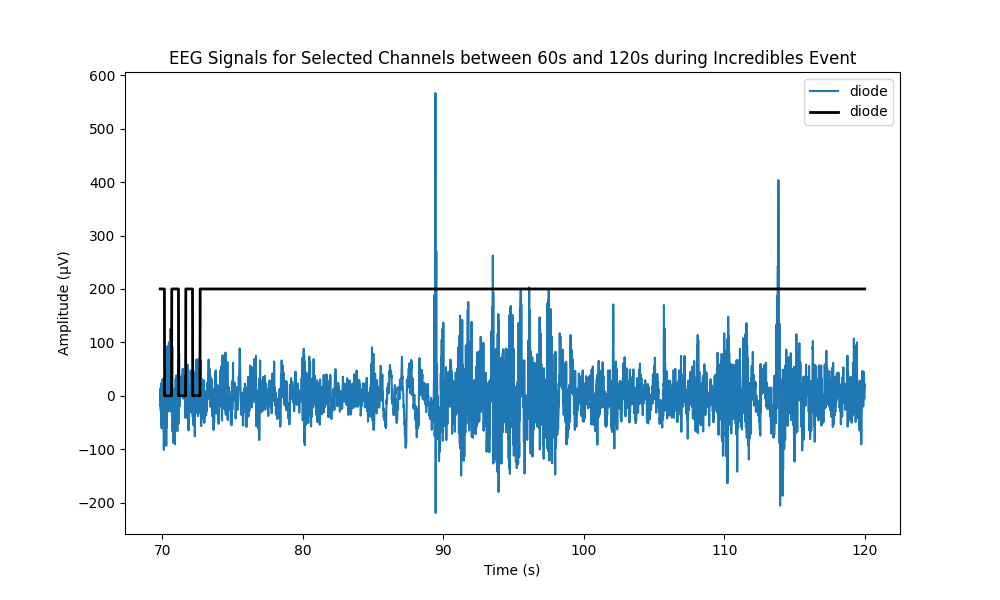

In [6]:
# Get selected child EEG channels for specific event and time window
seleted_time = [60, 120]
selected_event = 'Incredibles'
time, channels, data = multimodal_data.get_signals(
                mode='EEG', 
                member='ch', 
                selected_channels=['Fz', 'Cz', 'Pz'],
                selected_times=seleted_time,
                selected_events=[selected_event]
            )
time, channels, diode_data = multimodal_data.get_signals(
                mode='diode', 
                selected_channels=['diode'],
                selected_times=seleted_time,
                selected_events=[selected_event]
            )   
        
print(f"Retrieved EEG data shape: {data.shape}")  # Should be (n_channels, n_samples)
# Plot the retrieved EEG data
plt.figure(figsize=(10, 6))
for i, ch_name in enumerate(channels):
    plt.plot(time, data[i, :], label=ch_name)
plt.plot(time, diode_data[0, :]*200, label='diode', color='k', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signals for Selected Channels between {seleted_time[0]}s and {seleted_time[1]}s during {selected_event} Event')
plt.legend()
plt.show()

Event to marker mapping: {'Peppa': 1, 'Incredibles': 2, 'Brave': 3, 'Talk_1': 4, 'Talk_2': 5}


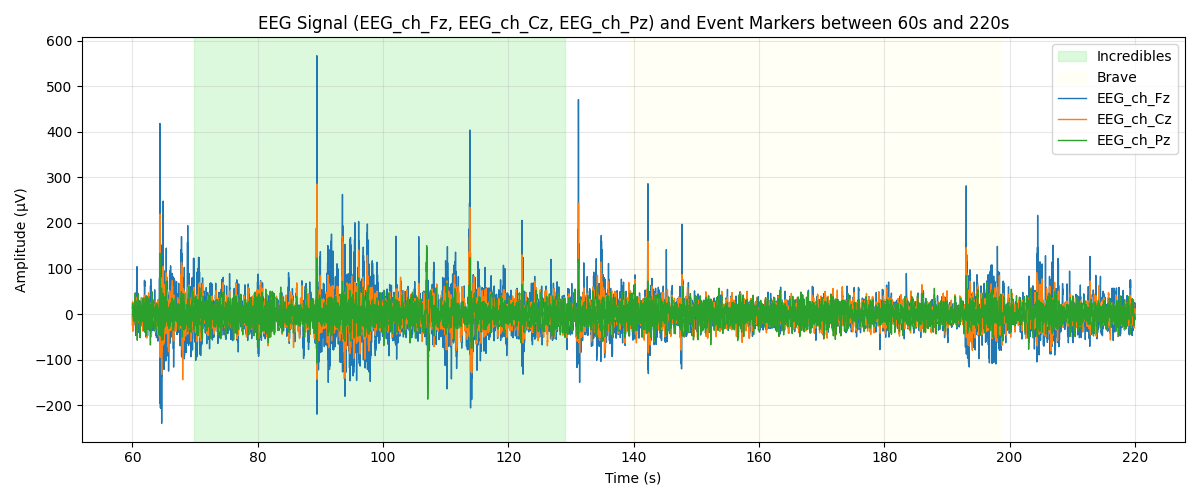

In [ ]:
# Get selected child EEG channels for specific event and time window
seleted_time = [60, 220]
selected_event = 'Incredibles'
time, channels, data = multimodal_data.get_signals(
                mode='EEG', 
                member='ch', 
                selected_channels=['Fz', 'Cz', 'Pz'],
                selected_times=seleted_time
            )
time, marker_channel, event_to_marker = multimodal_data.get_events_as_marker_channel(selected_times=seleted_time)

print("Event to marker mapping:", event_to_marker)
plot_signal_with_events(time, data,channels, marker_channel, event_to_marker, seleted_time)

## To select different typs of data we need to call the get_signals separately for each type


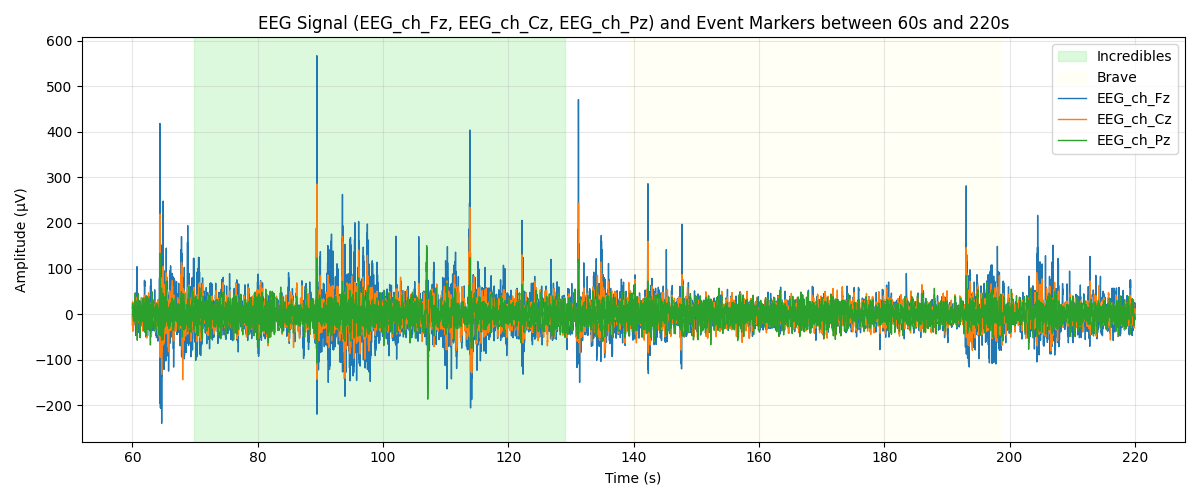

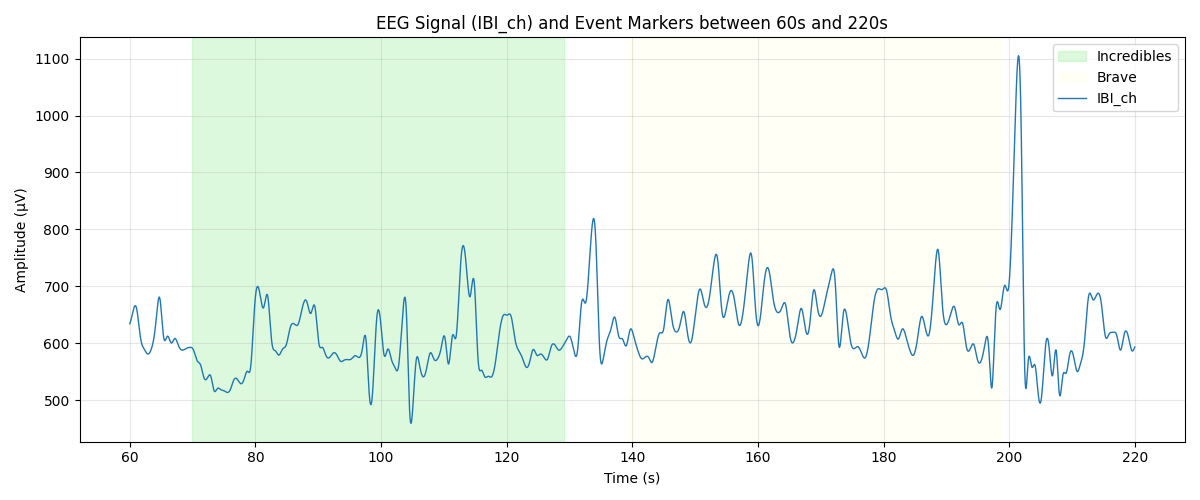

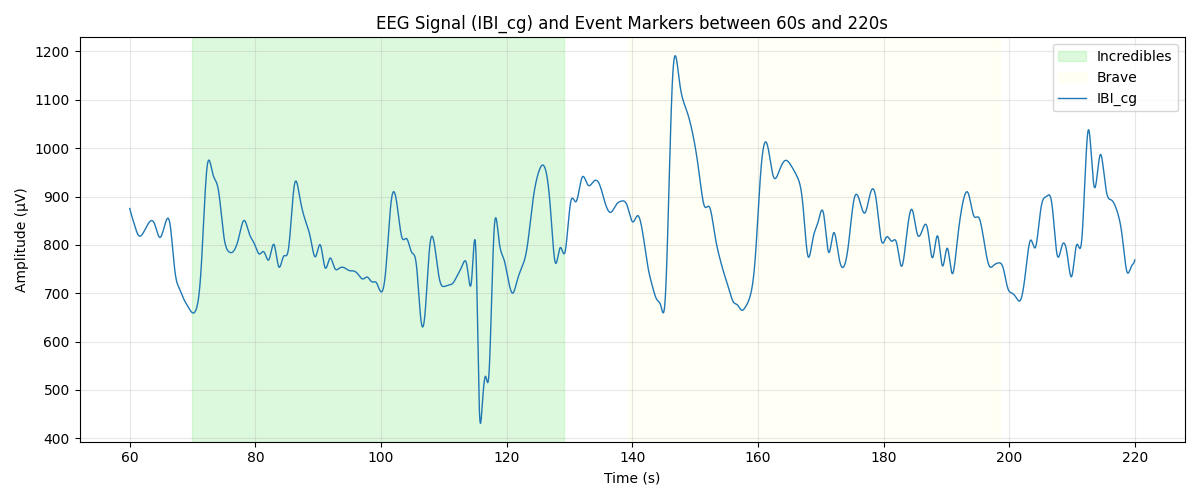

In [16]:
# Get selected child EEG channels for specific event and time window
seleted_time = [60, 220]
selected_event = 'Incredibles'
time, channels_EEG, data_EEG = multimodal_data.get_signals(
                mode='EEG', 
                member='ch', 
                selected_channels=['Fz', 'Cz', 'Pz'],
                selected_times=seleted_time
            )
time, channels_IBI_ch, data_IBI_ch = multimodal_data.get_signals(
                mode='IBI', 
                member='ch', 
                selected_channels=[''],
                selected_times=seleted_time
            )
time, channels_IBI_cg, data_IBI_cg = multimodal_data.get_signals(
                mode='IBI', 
                member='cg', 
                selected_channels=[''],
                selected_times=seleted_time
            )
time, marker_channel, event_to_marker = multimodal_data.get_events_as_marker_channel(selected_times=seleted_time)

plot_signal_with_events(time, data_EEG,channels_EEG, marker_channel, event_to_marker, seleted_time)
plot_signal_with_events(time, data_IBI_ch,channels_IBI_ch, marker_channel, event_to_marker, seleted_time)
plot_signal_with_events(time, data_IBI_cg,channels_IBI_cg, marker_channel, event_to_marker, seleted_time)